In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
symbol = 'AAPL'
data = yf.download(symbol, start='2020-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = data[['Close']]

In [4]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [5]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [7]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 2s 7ms/step - loss: 0.1917
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1185
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0430
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 9/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 11/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 12/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 13/50
13/13 [==============================

In [9]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

3/3 [==============================] - 0s 8ms/step


In [10]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

In [11]:
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Training MAE: {train_mae:.2f}')
print(f'Testing MAE: {test_mae:.2f}')

Training MAE: 2.62
Testing MAE: 2.73


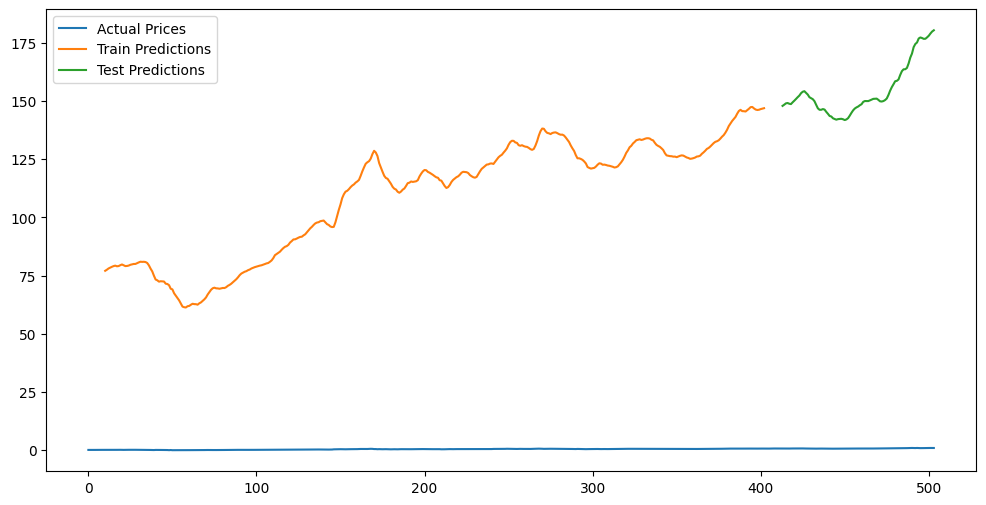

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual Prices')
plt.plot(range(seq_length, train_size), train_predictions, label='Train Predictions')
plt.plot(range(train_size + seq_length, len(data)), test_predictions, label='Test Predictions')
plt.legend()
plt.show()